### Add Colab Link

One of the most straightforward tasks we can perform on a data set without labels is to find groups of data in our dataset which are similar to one another -- what we call clusters.

K-Means is one of the most popular "clustering" algorithms. K-means stores k centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

## Dataset: MNIST

### MNIST Dataset: A Brief Overview

#### Introduction
The **MNIST (Modified National Institute of Standards and Technology) dataset** is one of the most widely used datasets in machine learning, particularly for benchmarking image classification algorithms.

#### Description
- **Type**: Handwritten digit dataset
- **Size**: 70,000 grayscale images (28x28 pixels)
  - **Training set**: 60,000 images
  - **Test set**: 10,000 images
- **Classes**: 10 (Digits 0-9)
- **Format**: Each image is a 28×28 matrix with pixel values ranging from 0 (black) to 255 (white).

#### Why MNIST?
- Simple yet challenging enough for ML research.
- Well-structured and preprocessed, eliminating the need for extensive data cleaning.

#### Accessing MNIST
- Available in popular ML libraries:
  - **TensorFlow/Keras**: `tf.keras.datasets.mnist`
  - **PyTorch**: `torchvision.datasets.MNIST`
  - **Scikit-learn**: `fetch_openml('mnist_784')`


In [27]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [28]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version = 1, parser = 'auto')
X, y = mnist['data'], mnist['target']

np.random.seed(42)

The MNIST digits in this set are flattened arrays of 784 pixels. We can reshape them to 28x28 pixels and plot them using matplotlib.

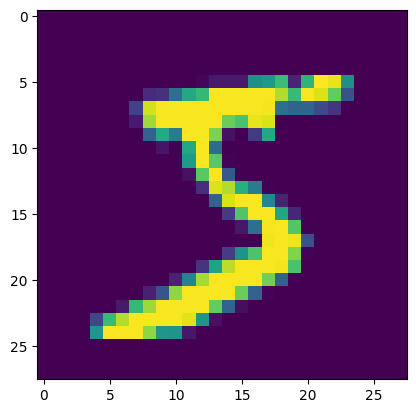

In [29]:
image = X.iloc[0, :].values.reshape((28, 28))
plt.imshow(image)

### 1. Preparing the Data

a. Using the full dataset, *normalize* each column so that the minimum column value is 0, and the maximum is 1.
    (Hint: if your normalization process leads to missing values, replace these with 0!)

b. Get a random sample of 10% of the data. The full dataset may take a while to run some of the below methods.

In [ ]:
# a.

In [ ]:
# b.

### 2. K-Means Clustering

a. Using the MNIST subset, determine the optimal k value for k-means according to the silhouette score. Use a range of k-values from 2 - 10. 

b. Fit a k-means model with the optimal k value.

c. Using a dimensionality reduction method, $t$-SNE, generate a two-dimensional representation (called an **embedding**)of the MNIST 4, 9 dataset. (See an example [here](https://scikit-learn.org/0.16/modules/generated/sklearn.manifold.TSNE.html). Use default values, but setting random_state = 42.)

d. Create two side-by-side scatterplots using the $t$-SNE represenation using plt.subfigs. Color the first fig according to the true labels and the second according to k-means cluster labels. Be sure to include proper figure titles and a legend.

e. Describe the fit. Does this align with your expectation, given the silhouette score?

f. Fit k-means with 10 clusters. How does the slihouette score compare with the optimal k? (If 10 is optimal, just say so.)

In [ ]:
# a.

In [ ]:
# b.

In [ ]:
# c.

In [ ]:
# d.

In [ ]:
# e.

In [ ]:
# f.

### 3. Hierarchical Clustering
Here you will be performing hierarchical clustering on the same data subset.

a. Here you will be comparing linkage methods and metrics. Use the following linkage/metric combinations:

| Linkage Method | Metrics              |
|---------------|----------------------|
| Ward         | Euclidean            |
| Single       | Euclidean, Cosine, Manhattan |
| Complete     | Euclidean, Cosine, Manhattan |
| Average      | Euclidean, Cosine, Manhattan |

a. Fit hierarhiccal clustering with 10 for each combination and store the silhouette scores. 

b. According to the silhouette scores, which combination is optimal? Fit an HC model with this combination and store the cluster labels (make these a different variable name from that used for your k-means labels; we will eventually be comparing all clustering models).

c. As in part 1. d., plot side-by-side scatterplots using the same $t$-SNE embedding.

d. Describe the fit. Does this align with your expectation, given the silhouette score?


In [ ]:
# a.

In [ ]:
# b.

In [ ]:
# c.

In [ ]:
# d.

### 4. DBSCAN Clustering

DBSCAN can be a little tricky to tune due to is two hyperparameters, `eps` and `min_samples`. The `eps` parameter is the maximum distance between two samples for one to be considered as in the neighborhood of the other. The `min_samples` parameter is the number of samples in a neighborhood for a point to be considered as a core point. Here we will be attempting to find optimal hyperparameter combinations, focusing primarily on `eps`.

a. A rule of thumb is to set the min_samples to be the dimensions of the dataset (number of columns) + 1. 
    Here you will try two different values: (1) Follow the rule of thumb, and (2) take the number of observations in the sample divided by 10 (roughly equal numbers per digit label).

  i. For each min_samples value (the two of them), calculate the the distance between every datapoint and its **kth closest neighbor** (Hint: try squreform(pdist(X)), from the scipy.spatial.distance package.)
  ii. Find the average kth nearest neighbor distance (for both of the two min_samples)    
  iii. Find the standard deviation of the kth nearest neighbor distance (for both of the two min_samples).
  iv. Get a set of 10 eps. values equally spaced between the mean $\pm$ the standard deviation (for both of the two min_samples).

b. Using the sets of min_samples and eps. values, apply DBSCAN and record all silhouette scores. 

c. Fit DBSCAN with the best hyperparemeters per the scores.

d. Plot the $t$-SNE embedded values using subplots, one colored by true labels and other by cluster labels.

e. Describe the fit and comment on your results.

In [ ]:
# a.

In [ ]:
# b.

In [ ]:
# c.

In [ ]:
# d.

In [ ]:
# e.

### 5. Adjusted Rand Index (ARI) in Clustering

The **Adjusted Rand Index (ARI)** is a metric used to evaluate the similarity between two clusterings, accounting for chance. It measures how well a clustering algorithm’s results match a known ground truth or reference clustering.

#### **Intuition**
- Suppose you have a set of data points, and you classify them into groups (clusters).
- ARI compares your clustering to a "correct" classification and checks how often pairs of points are **correctly grouped together** or **correctly separated** in both cases.
- A simple **Rand Index** gives a raw similarity score, but ARI adjusts for randomness—ensuring that random assignments don’t get an artificially high score.

#### **How It's Used**
- **Benchmarking Clustering Algorithms:** ARI is useful for comparing different clustering methods to a gold-standard classification.
- **No Bias Toward Number of Clusters:** Unlike some other metrics, ARI corrects for the number of clusters, making it more reliable when clusters differ in size or number.

#### **Interpreting Results**
- **Range:** ARI ranges from **-1 to 1**.  
  - **1** = Perfect agreement with ground truth  
  - **0** = Random clustering  
  - **Negative values** = Worse than random (unlikely in practice)  
- **Application:** Used in cases like image segmentation, document clustering, or biological data grouping, where a reference classification exists.

### **Python Implementation**
- **Import** via sklearn.metrics (the function `adjusted_rand_score`)
- **Inputs**: True Labels, Predicted Labels (E.g., cluster labels)
- **Output**: The Adjusted Rand Index Value


#### Questions:

a. For each clustering method (k-means, hierarchical clustering, DBSCAN), calculate the adjusted rand index using the models with optimal hyperparameters.

b. Plot all four scatterplots using subplots (1 row, 4 columns). The first colored by the true values, and the rest colored by your cluster labels (k-means, HC, DBSCAN).

c. Do the scores seem reflecive of the assigned cluster labels, according to the plots?  Please explain.

In [ ]:
# a.

In [ ]:
# b.

In [ ]:
# c.